# Estimando os Preços de Locação do Airbnb Usando Pycaret

In [35]:
# Carregando as bibliotecas
import pandas as pd
import locale
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Importando a base de dados 'airbnb_dataset' 
df = pd.read_csv('airbnb_dataset.csv')
df.head()

,cancellation_policy,cleaning_fee,city,instant_bookable,latitude,longitude,property_type,room_type,amenities,accommodates,...,host_identity_verified,host_response_rate,host_since,last_review,neighbourhood,review_scores_rating,zipcode,bedrooms,beds,price
0,strict,1,NYC,f,40.696524,-73.991617,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,...,t,100%,2012-03-26,2016-07-18,Brooklyn Heights,100,11201,1,1,150.0
1,strict,1,NYC,t,40.766115,-73.989040,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,...,f,100%,2017-06-19,2017-09-23,Hell's Kitchen,93,10019,3,3,169.0
2,moderate,1,NYC,t,40.808110,-73.943756,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,...,t,100%,2016-10-25,2017-09-14,Harlem,92,10027,1,3,145.0
3,flexible,1,SF,f,37.772004,-122.431619,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,...,t,100%,2015-04-19,2017-04-30,Lower Haight,100,94117.0,2,2,750.0
4,moderate,1,DC,t,38.925627,-77.034596,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,...,t,100%,2015-03-01,2017-01-22,Columbia Heights,40,20009,0,1,115.0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cancellation_policy     74111 non-null  object 
 1   cleaning_fee            74111 non-null  int64  
 2   city                    74111 non-null  object 
 3   instant_bookable        74111 non-null  object 
 4   latitude                74111 non-null  float64
 5   longitude               74111 non-null  float64
 6   property_type           74111 non-null  object 
 7   room_type               74111 non-null  object 
 8   amenities               74111 non-null  object 
 9   accommodates            74111 non-null  int64  
 10  bed_type                74111 non-null  object 
 11  number_of_reviews       74111 non-null  int64  
 12  bathrooms               74111 non-null  float64
 13  host_has_profile_pic    74111 non-null  object 
 14  first_review            74111 non-null

## Ajustando algumas colunas

**Convertendo 'host_response_rate' para o formato númerico.**

In [38]:

df['host_response_rate']

0        100%
1        100%
2        100%
3        100%
4        100%
         ... 
74106    100%
74107    100%
74108    100%
74109    100%
74110    100%
Name: host_response_rate, Length: 74111, dtype: object

In [39]:
# Eliminando o caractere '%' de df['host_response_rate']
locale.setlocale(locale.LC_ALL,'')
df['host_response_rate']=df.host_response_rate.map(lambda x: locale.atof(x.strip('%')))


In [40]:
# Convertendo para o formato int
df['host_response_rate'] = df['host_response_rate'].astype(int)
df['host_response_rate'] 

0        100
1        100
2        100
3        100
4        100
        ... 
74106    100
74107    100
74108    100
74109    100
74110    100
Name: host_response_rate, Length: 74111, dtype: int32

**Eliminando valores anomâlos em df['zipcode']**

In [41]:
#  Identificando os valores anômalos e eliminando as linhas em que se encontraram.
x1 = df.loc[df['zipcode']=='95202\r\r\r\r\r\r\n\r\r\r\r\r\r\n\r\r\r\r\r\r\n94158']
df = df.drop(x1.index)
x2 = df.loc[df['zipcode']== '11249\r\r\r\r\r\r\n11249']
df = df.drop(x2.index)
x3 = df.loc[df['zipcode']=='20007-3413']
df = df.drop(x3.index)
x4 = df.loc[df['zipcode']=='11385-2308']
df = df.drop(x4.index)
x5 = df.loc[df['zipcode']=='91606-1412']
df = df.drop(x5.index)
x6 = df.loc[df['zipcode']=='11426-1175']
df = df.drop(x6.index)
x7 = df.loc[df['zipcode']=='91001-2243']
df = df.drop(x7.index)
x8 = df.loc[df['zipcode']=='Near 91304']
df = df.drop(x8.index)
x9 = df.loc[df['zipcode']=='10002-2289']
df = df.drop(x9.index)
x10 = df.loc[df['zipcode']== '90039-2715']
df = df.drop(x10.index)
x11 = df.loc[df['zipcode']== '20001-4044']
df = df.drop(x11.index)
x12 = df.loc[df['zipcode']== '90403-2638']
df = df.drop(x12.index)
x13 = df.loc[df['zipcode']== '60660-1448']
df = df.drop(x13.index)
x14 = df.loc[df['zipcode']== '90036-2514']
df = df.drop(x14.index)
x15 = df.loc[df['zipcode']== '10003-8623']
df = df.drop(x15.index)
x16 = df.loc[df['zipcode']== ' ']
df = df.drop(x16.index)
x17 = df.loc[df['zipcode']== '11103-3233']
df = df.drop(x17.index)
x18 = df.loc[df['zipcode']== '1m']
df = df.drop(x18.index)
x19 = df.loc[df['zipcode']== '90034-2203']
df = df.drop(x19.index)
x20 = df.loc[df['zipcode']== '90035-4475']
df = df.drop(x20.index)


In [42]:
df['zipcode'] = df['zipcode'].astype(float)

In [43]:
df['cleaning_fee'] = df['cleaning_fee'].astype(object)

In [44]:
# Aqui eliminamos as colunas desnecessárias para construção do modelo de regressão.
df = df.drop(['first_review', 'amenities', 'host_since', 'neighbourhood'], axis = 1)

## Eliminando os outliers dos preços

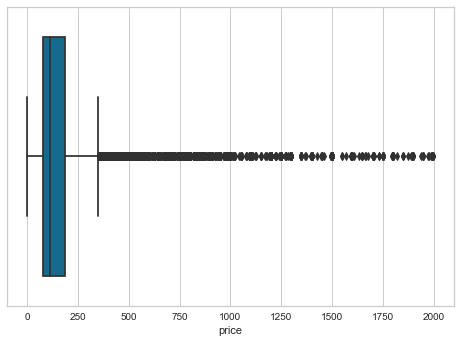

In [45]:
# Exibindo os outliers dos preços
sns.boxplot(data= df, x = 'price')
plt.show()

In [47]:
# Aplicando o método quantile
price_q1 = df['price'].quantile(.25)
price_q3 =df['price'].quantile(.75)
price_qr = price_q3 - price_q1

In [48]:
price_up = price_q3 + 1.5*price_qr
price_down = price_q1 - 1.5*price_qr

In [49]:
# Inserindo os preços sem outliers no dataframe
df = df[(df['price']> price_down) & (df['price'] < price_up)]

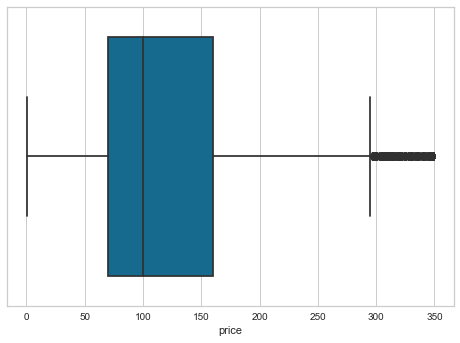

In [51]:
# Exibindo os preços após eliminar os outliers
sns.boxplot(data= df, x = 'price')
plt.show()

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68365 entries, 0 to 74110
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cancellation_policy     68365 non-null  object 
 1   cleaning_fee            68365 non-null  object 
 2   city                    68365 non-null  object 
 3   instant_bookable        68365 non-null  object 
 4   latitude                68365 non-null  float64
 5   longitude               68365 non-null  float64
 6   property_type           68365 non-null  object 
 7   room_type               68365 non-null  object 
 8   accommodates            68365 non-null  int64  
 9   bed_type                68365 non-null  object 
 10  number_of_reviews       68365 non-null  int64  
 11  bathrooms               68365 non-null  float64
 12  host_has_profile_pic    68365 non-null  object 
 13  host_identity_verified  68365 non-null  object 
 14  host_response_rate      68365 non-null

In [18]:
# Importando o modelo de regressão linear da biblioteca do pycaret
from pycaret.regression import *

In [19]:
# Definindo o tamanho da amostra que será usada como teste do modelo
data = df.sample(frac=0.95, random_state=786)
df_unseen = df.drop(data.index)
data.reset_index(inplace=True, drop=True)
df_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(df.shape))
print('Unseen Data For Predictions: ' + str(df_unseen.shape))

Data for Modeling: (68365, 21)
Unseen Data For Predictions: (3418, 21)


**Agora podemos aplicar a funação `setup()` que cria uma ambiente no pycaret, onde uma pepiline de transformação dos dados necessários para aplicarmos os modelos de machine learning.**

In [20]:
# Criando a função um setup. O target será a feature 'price'.
s = setup(data, target = 'price', numeric_features= ['host_response_rate'], 
transform_target = True, log_experiment = True, experiment_name = 'airbnb')

,Description,Value
0,session_id,3576
1,Target,price
2,Original Data,"(64947, 21)"
3,Missing Values,False
4,Numeric Features,7
5,Categorical Features,12
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(45462, 128)"


**A função `compare_models()` quando executada permite compararmos a peformance de vários modelos de machine learning**

In [21]:
best = compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,31.7783,2054.9433,45.3272,0.5706,0.3445,0.2826,0.6350
rf,Random Forest Regressor,32.3361,2123.3049,46.0749,0.5563,0.3507,0.2875,29.7700
gbr,Gradient Boosting Regressor,33.5839,2267.0491,47.6085,0.5263,0.3625,0.3011,9.3000
br,Bayesian Ridge,36.3947,2564.4658,50.6357,0.4641,0.3907,0.3313,1.6970
et,Extra Trees Regressor,35.9574,2599.4372,50.9805,0.4568,0.3945,0.3260,37.9430
ridge,Ridge Regression,36.9452,2626.0560,51.2401,0.4513,0.3958,0.3370,0.1420
omp,Orthogonal Matching Pursuit,37.5160,2699.4880,51.9519,0.4359,0.4013,0.3426,0.1460
ada,AdaBoost Regressor,41.0054,3323.1238,57.6194,0.3054,0.4332,0.3730,4.8320
dt,Decision Tree Regressor,45.2188,4073.8551,63.8209,0.1486,0.4869,0.4155,1.3490
lr,Linear Regression,43.1678,4269.1638,63.1599,0.1075,0.4597,0.3979,2.2420


#### Identificamos pela tabela acima que o modelo Light Gradient Boosting Machine é o melhor modelo dentre todos pesquisados pela função modelo().

#### Ainda podemos tentar melhorar ainda mais nosso modelo usando o cross valadation e obter avaliações nas métricas de validação ainda melhores.

In [22]:
# Usando o cross validation para melhorar nosso modelo
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,32.1514,2103.7694,45.8669,0.5632,0.3526,0.2953
1,31.8064,2017.7590,44.9195,0.5716,0.3447,0.2835
2,31.4334,1995.9405,44.6759,0.5766,0.3436,0.2816
3,32.0479,2104.1644,45.8712,0.5617,0.3446,0.2800
4,32.2523,2112.9455,45.9668,0.5695,0.3461,0.2871
5,31.4770,2034.8287,45.1091,0.5742,0.3457,0.2855
6,30.9716,1941.4843,44.0623,0.5871,0.3347,0.2734
7,31.6504,2049.3440,45.2697,0.5729,0.3451,0.2830
8,31.6921,2059.8247,45.3853,0.5729,0.3388,0.2757
9,32.3005,2129.3727,46.1451,0.5564,0.3491,0.2810


## Plotando os resultados do modelo treinado.

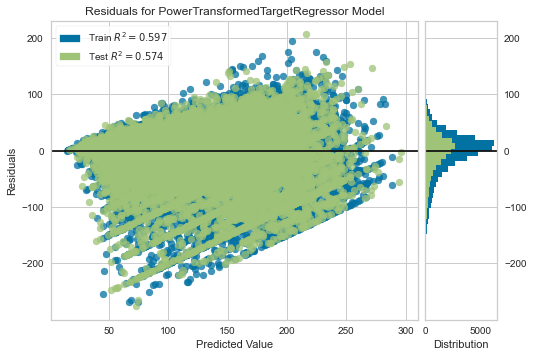

In [23]:
plot_model(lightgbm)

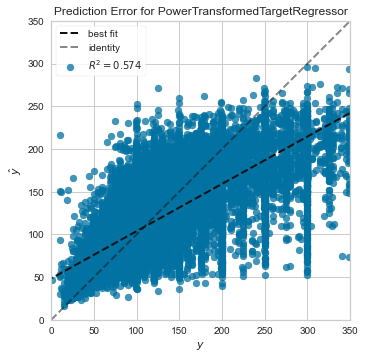

In [24]:
plot_model(lightgbm, plot = 'error')

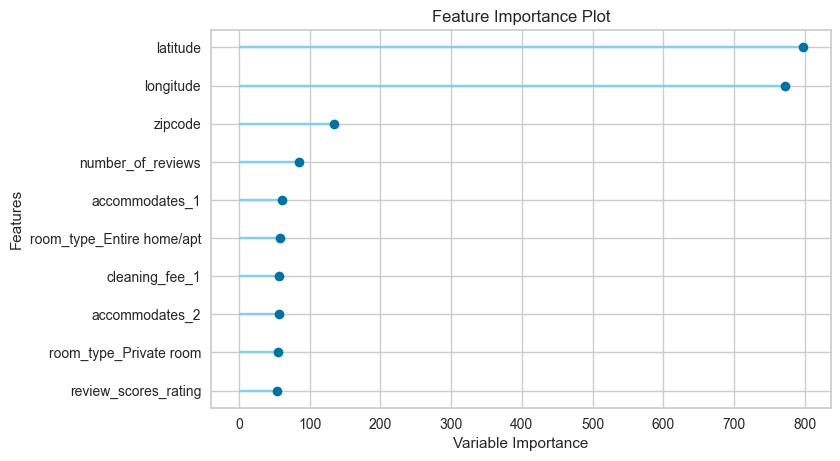

In [25]:
# Mostrando as features com mais impacto na previsão dos preços.
plot_model(lightgbm, plot = 'feature')

In [26]:
# Criando um coluna com valores das classes previstas dos dados não vistos pelo modelo.
unseen_predictions = predict_model(lightgbm, data=df_unseen)
unseen_predictions.head()

,cancellation_policy,cleaning_fee,city,instant_bookable,latitude,longitude,property_type,room_type,accommodates,bed_type,...,host_has_profile_pic,host_identity_verified,host_response_rate,last_review,review_scores_rating,zipcode,bedrooms,beds,price,Label
0,moderate,1,LA,t,33.980454,-118.462821,Apartment,Entire home/apt,3,Real Bed,...,t,f,100,2017-04-21,97,90292.0,1,1,83.0,144.156834
1,strict,1,DC,t,38.919630,-77.031189,Apartment,Entire home/apt,6,Real Bed,...,t,t,100,2017-04-30,89,20009.0,2,3,200.0,169.286027
2,moderate,1,Chicago,f,41.908240,-87.695242,Apartment,Private room,2,Real Bed,...,t,t,100,2017-04-30,100,60622.0,1,1,60.0,56.847985
3,strict,1,NYC,f,40.739612,-73.999762,Apartment,Entire home/apt,2,Real Bed,...,t,t,71,2017-04-30,80,10011.0,1,1,141.0,181.250682
4,flexible,0,LA,f,34.129736,-118.145861,Apartment,Private room,2,Real Bed,...,t,t,100,2017-04-30,100,91106.0,1,1,80.0,66.359072


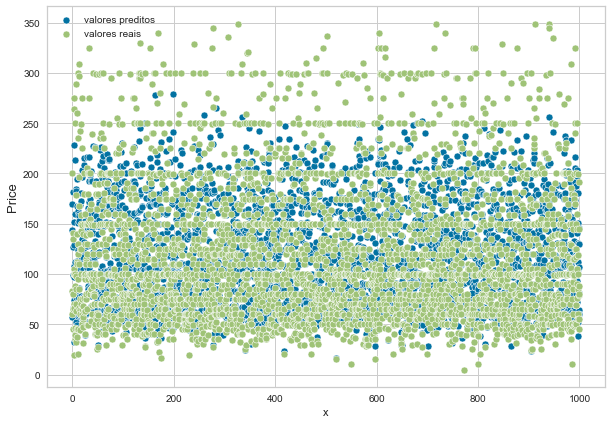

In [28]:
# Comparando os valores dos preços preditos com os valores reias.
x = np.linspace(0, 1000, 3418)

plt.figure(figsize = (10, 7))
sns.scatterplot(x = x, y = unseen_predictions.Label, label='valores preditos')
sns.scatterplot(x = x, y = unseen_predictions.price, label='valores reais')
plt.xlabel('x')
plt.ylabel('Price', size = 13)
plt.show();

In [29]:
# Filtrando os preços 
yp = unseen_predictions[unseen_predictions.Label < 200]
yr = unseen_predictions[unseen_predictions.price < 200]

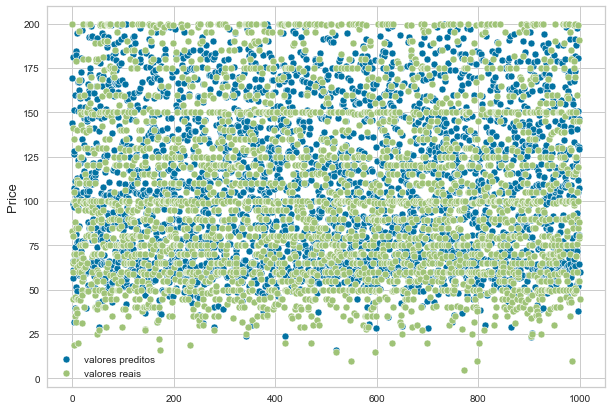

In [33]:
x = np.linspace(0, 1000, 3169)
x2 = np.linspace(0, 1000, 3021)

plt.figure(figsize = (10, 7))
sns.scatterplot(x = x, y = yp.Label, label='valores preditos')
sns.scatterplot(x = x2, y = yr.price, label='valores reais')
plt.ylabel('Price', size = 13)
plt.show();

 **Concluimos que nosso modelo de regressão não performa tão bem quanto os preços dos imóveis estão acima de 200. Isso se deve ao fato de que há bastante  dispersão nos valores dos preços na base de dados. Podemos posteriormente considerar modelos de machine learning não cobertos pelo pycarat para tentar melhorar o modelo de previsão. Além disso, apenas a longitude e a latitude da localização dos imóveis possuem maior relavância na previsão dos preços. Em outras palavras não temos dados com correlação suficiente para construir um bom modelo de previsão com a nossa base de dados atual. Contudo, mostramos que a localiação dos imóveis para locação é fundamental para se prever os preços, bem mais que as outras features.**